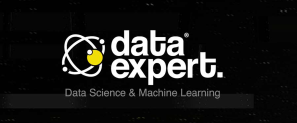


# **Mini Projeto - Wallmart**

**Grupo: D3G08**

Gabriel Victor Leite Oliveira - #12569

Gesiel Rodrigues Dos Anjos Souza - #6964 

Guilherme Sbrissa Almada - #7415 

Ian Rossi - #7286 

Izabelle Cristine De Sousa Melo - #1085 

Thiago Bomfim Farias - #13407 


## 1. A Questão de Negócio

Fomos contratados pelo Wallmart para fazer um levantamento do
faturamento de suas lojas nos USA e apontar qual loja seria a melhor para
expandir seu tamanho.

Iremos analisar os dados disponibilizados, extrair as informações importantes e ao final, baseados nos insights que tivermos, fazer um modelo que indicará qual loja deve ser expandida.



## 2. O Entendimento do Negócio

### 2.1 Apresentação

Walmart Inc., é uma multinacional estadunidense de lojas de
departamento.

A companhia foi fundada por Sam Walton em 1962, incorporada em 31 de
outubro de 1969 e abriu seu capital na New York Stock Exchange (NYSE), em 1972.

No ano de 2021, obteve um um lucro de $13.51 Bilhões. Sendo uma das principais lojas de varejo do mundo.

Os dados que nos disponibilizaram **contemplam as vendas semanais de 45 lojas** espalhadas pelos Estados Unidos.

O Walmart realiza vários eventos promocionais de descontos ao longo do
ano. Essas remarcações precedem feriados importantes, os quatro maiores de
todos, que são o Super Bowl, o Dia do Trabalho, o Dia de Ação de Graças e o
Natal.

As semanas que incluem esses feriados têm um peso maior.

### 2.2 Sobre os Dados

Os dados que utilizaremos foi retirado do kaggle.
Disponível no endereço: https://www.kaggle.com/yasserh/walmart-dataset

Os dados apresentam as **vendas semanais de 05/02/10 até 01/11/12 em 45 lojas**
varejistas da rede Walmart e também algumas métricas econômicas e
meteriológicas por semana.

#### 2.2.1 Dicionário dos dados

Breve descrição das features disponíveis no dataset:

*   Store - número da Loja
*   Date - semana de vendas
*   Weekly_Sales - vendas semanal da loja
*   Holiday_Flag - **1**: quando é uma semana de feriado – **0**: quando não é
*   Temperature - Temperatura do dia da venda (em F°)
*   Fuel_Price - Preço do combustível na região
*   CPI – *Consumer Price Index* (Índice de preços ao consumidor)
*   Unemployment - Taxa de desemprego
*   Holiday Events (Feriados):
 *   **Super Bowl**: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
 *   **Labour Day**: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
 *   **Thanksgiving**: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
 *   **Christmas**: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13




## 3. A Coleta de Dados

In [ ]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Baixando o Dataset Wallmart.csv do Google Drive

!gdown --id 1hHRFZspoDTwroF8GTdjIFC4pnPRe2Qc9

Downloading...
From: https://drive.google.com/uc?id=1hHRFZspoDTwroF8GTdjIFC4pnPRe2Qc9
To: /content/Walmart.csv
100% 364k/364k [00:00<00:00, 14.5MB/s]


In [ ]:
# Carregando o dataset

df = pd.read_csv('Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# Verificando as informações do dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
# Verificando as dimensões do dataset

df.shape

(6435, 8)

## 4. A Limpeza de Dados

In [ ]:
# Verificando se há dados faltantes

df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
# Verificando se há valores duplicados

df.duplicated().sum()

0

In [ ]:
# Alterando a coluna Temperature para °C
df['Temperature'] = df.Temperature.apply(lambda x : (x - 32) * (5 / 9))
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,8.055556,2.625,211.350143,8.106


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True)
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106,2,2010
1,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106,2,2010
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106,2,2010
4,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106,3,2010
5,1,2010-03-12,1439541.59,0,14.327778,2.667,211.380643,8.106,3,2010
6,1,2010-03-19,1472515.79,0,12.544444,2.720,211.215635,8.106,3,2010
7,1,2010-03-26,1404429.92,0,10.805556,2.732,211.018042,8.106,3,2010
8,1,2010-04-02,1594968.28,0,16.816667,2.719,210.820450,7.808,4,2010
9,1,2010-04-09,1545418.53,0,18.811111,2.770,210.622857,7.808,4,2010


In [ ]:
# Estatística descritiva das variáveis numéricas

pd.set_option('display.float_format', lambda x: '%.2f' % x) # ajustando a exibição dos valores float

colunas_numericas = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
df[colunas_numericas].describe().T

,count,mean,std,min,25%,50%,75%,max
Weekly_Sales,6435.00,1046964.88,564366.62,209986.25,553350.10,960746.04,1420158.66,3818686.45
Temperature,6435.00,15.92,10.25,-18.92,8.59,17.04,23.86,37.86
Fuel_Price,6435.00,3.36,0.46,2.47,2.93,3.44,3.73,4.47
CPI,6435.00,171.58,39.36,126.06,131.74,182.62,212.74,227.23
Unemployment,6435.00,8.00,1.88,3.88,6.89,7.87,8.62,14.31


## 5. A Exploração de Dados

- Quais as minhas métricas essenciais?
- Baseado nos dados, qual imóvel ou tipo de imóveis eu deveria comprar?

In [ ]:
# Verificando o número de valores únicos em cada coluna

df.nunique().sort_values()

Holiday_Flag       2
Year               3
Month             12
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

São 143 datas diferentes e 45 lojas diferentes, totalizando 6435, corrobora com a quantidade de linhas que vimos anteriormente nas dimensões do dataset. 

O que quer dizer que cada uma das lojas tem a mesma quantidade de registro de vendas.

In [ ]:
df['Store'].value_counts()

1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: Store, dtype: int64

In [ ]:
correMat = df.corr()
correMat

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
Store,1.00,-0.34,-0.00,-0.02,0.06,-0.21,0.22,0.00,0.00
Weekly_Sales,-0.34,1.00,0.04,-0.06,0.01,-0.07,-0.11,0.08,-0.02
Holiday_Flag,-0.00,0.04,1.00,-0.16,-0.08,-0.00,0.01,0.12,-0.06
Temperature,-0.02,-0.06,-0.16,1.00,0.14,0.18,0.10,0.24,0.06
Fuel_Price,0.06,0.01,-0.08,0.14,1.00,-0.17,-0.03,-0.04,0.78
CPI,-0.21,-0.07,-0.00,0.18,-0.17,1.00,-0.30,0.00,0.07
Unemployment,0.22,-0.11,0.01,0.10,-0.03,-0.30,1.00,-0.01,-0.24
Month,0.00,0.08,0.12,0.24,-0.04,0.00,-0.01,1.00,-0.19
Year,0.00,-0.02,-0.06,0.06,0.78,0.07,-0.24,-0.19,1.00


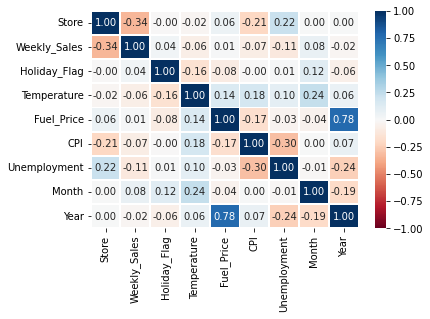

In [ ]:
sns.heatmap(correMat, cmap="RdBu", vmin=-1, vmax=1, annot=True, fmt='.2f', linewidth=1)
plt.show()

Heatmap mostrando a correlação (positiva ou negativa) entre as colunas.
Não foi identificado nenhuma correlação relevante entre as partes.

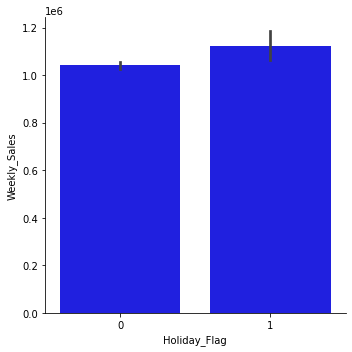

In [ ]:
# Gráfico com a relação das vendas da semana com a flag com feriado e sem feriado

sns.catplot(data = df, x = 'Holiday_Flag', y = 'Weekly_Sales', kind = 'bar', color = 'b')
plt.show()

Por esse gráfico parece que os feriados não tem grande impacto no valor das vendas, já que os valores, na média, estão muito próximos.

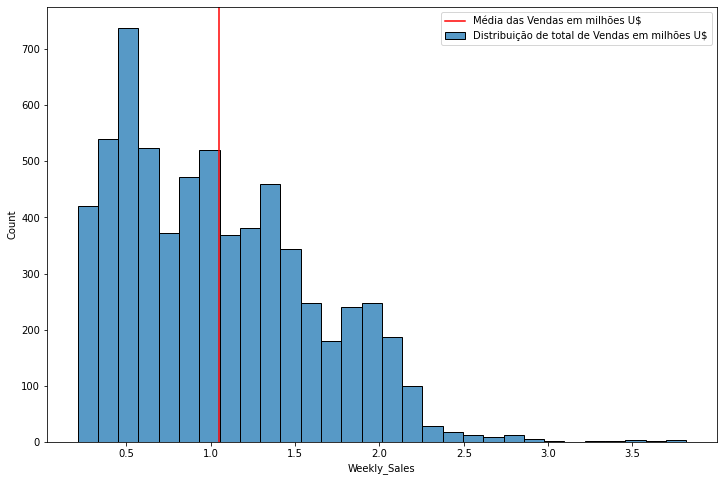

In [ ]:
# distribuição das vendas semanais

ws_mean = df['Weekly_Sales'].mean() /1000000

fig, ax = plt.subplots(figsize=(12,8))
ax = sns.histplot(df['Weekly_Sales'] /1000000, label = 'Distribuição de total de Vendas em milhões U$', bins = 30)
plt.axvline(ws_mean, color='red', label='Média das Vendas em milhões U$')
plt.legend()
plt.show()

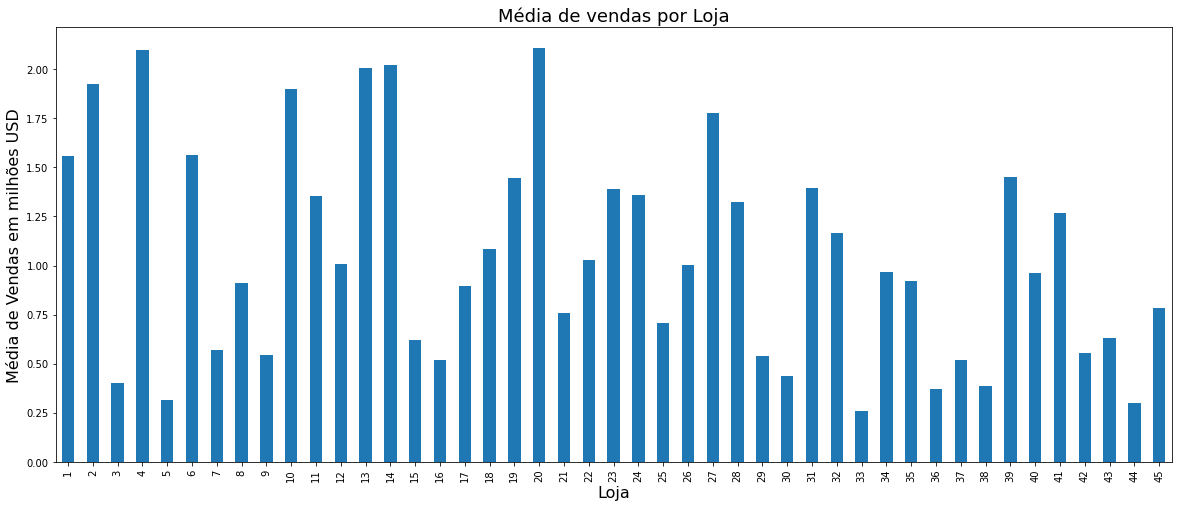

In [ ]:
# Média de vendas nas diferentes lojas

weekly_sales = df['Weekly_Sales'].groupby(df['Store']).mean() / 1000000
plt.figure(figsize=(20,8))
weekly_sales.plot.bar();
plt.title('Média de vendas por Loja', fontsize=18);
plt.ylabel('Média de Vendas em milhões USD', fontsize=16);
plt.xlabel('Loja', fontsize=16);

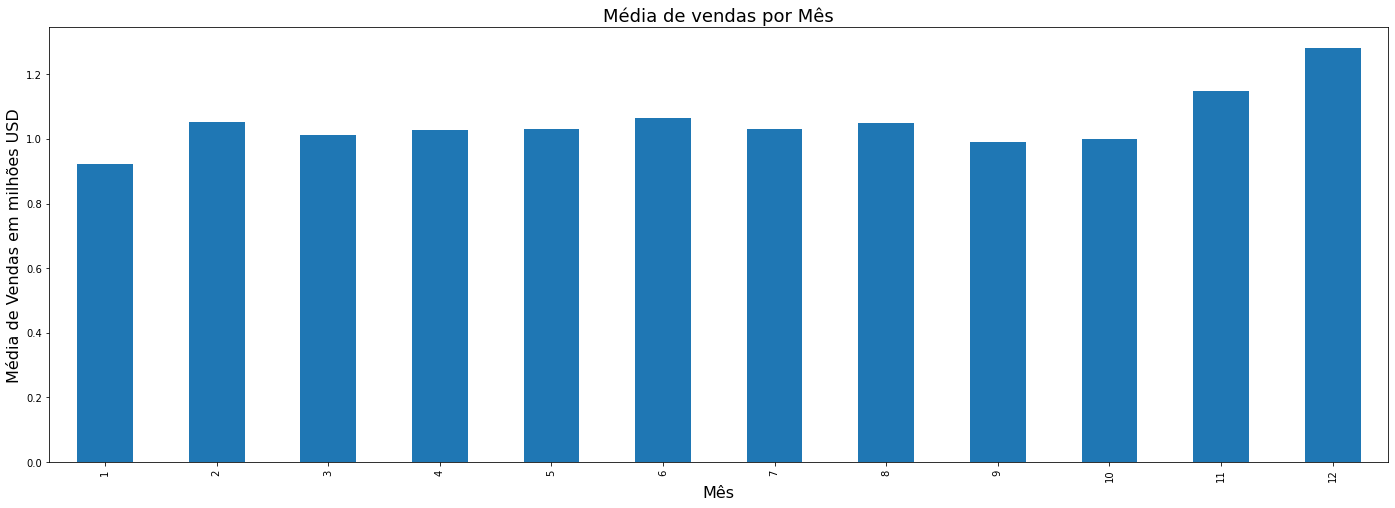

In [ ]:
# Média de vendas em cada mês

date_sales = df['Weekly_Sales'].groupby(df['Month']).mean() / 1000000
plt.figure(figsize=(24,8))
date_sales.plot.bar();
plt.title('Média de vendas por Mês', fontsize=18);
plt.ylabel('Média de Vendas em milhões USD', fontsize=16);
plt.xlabel('Mês', fontsize=16);

Dezembro é o mês que, na média, mais vende.

Tabela com as 10 maiores vendas.

Vale mencionar que nenhuma das 10 maiores vendas tem marcado o Holiday Flag, ou seja, nenhuma das 10 maiores vendas foi em um feriado.

In [ ]:
df[['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price']].nlargest(10,'Weekly_Sales')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price
1905,14,2010-12-24,3818686.45,0,-0.78,3.14
2763,20,2010-12-24,3766687.43,0,-3.79,3.14
1333,10,2010-12-24,3749057.69,0,13.92,3.24
527,4,2011-12-23,3676388.98,0,2.18,3.10
1762,13,2010-12-24,3595903.20,0,1.61,2.85
1814,13,2011-12-23,3556766.03,0,-4.02,3.19
2815,20,2011-12-23,3555371.03,0,4.55,3.39
475,4,2010-12-24,3526713.39,0,6.23,2.89
1385,10,2011-12-23,3487986.89,0,9.09,3.54
189,2,2010-12-24,3436007.68,0,9.98,2.89


Vale mencionar também que a Loja 14 é a loja que teve a maior venda, mas só aparece uma vez no top 10.

Já a loja 10, 13 e 20, aparecem 2 vezes no top 10.

Vamos agora pinçar as 10 Lojas com as maiores vendas no total (somatório)

In [ ]:
sum_sales = df.groupby('Store').sum()
sum_sales['Weekly_Sales'].sort_values(ascending = False).head(10).to_frame()

,Weekly_Sales
Store,
20,301397792.46
4,299543953.38
14,288999911.34
13,286517703.80
2,275382440.98
10,271617713.89
27,253855916.88
6,223756130.64
1,222402808.85


As lojas com as maiores médias de vendas são também as que mais venderam no total. Exemplo: loja 20 e loja 4

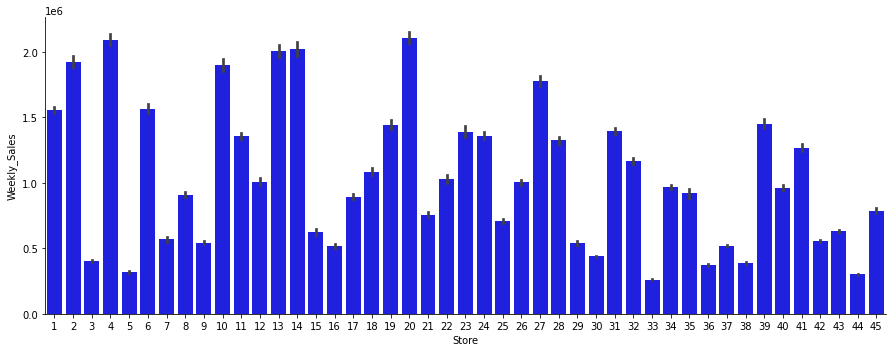

In [ ]:
# Gráfico com a relação no estilo barras entre cada loja e as suas vendas

sns.catplot(data = df, x = 'Store', y = 'Weekly_Sales', color = 'b', kind = 'bar', aspect = 2.5)
plt.show()

Conseguimos enxergar uma disparidade de vendas semanais em algumas lojas, tanto pelo gráfico como pela tabela com as 10 lojas com maiores valores de venda.

Podemos deduzir que algumas lojas vendem mais. Só não teremos como saber os motivos, já que não temos outras informações como localização, tamanho das lojas e etc.

Relação do CPI nas vendas:

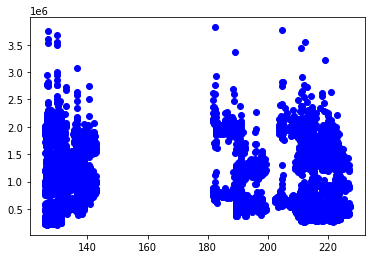

In [ ]:
plt.scatter(data = df, x ='CPI' , y = 'Weekly_Sales', color = 'b')
plt.show()

O CPI mede a variação de preços de bens e serviços de um mês comparado ao mês anterior nos EUA.

Para seguir os efeitos do aumento de preço e da inflação na economia é usado como ano-base, o ano de 1995. Assim, os preços nessa data são iguais a 100 Se o índice de preço está em 50, isso indica que ele está metade que foi no ano de 1995.

O Índice de Preço ao Consumidor é um dos indicadores mais importantes pois reflete o aumento de preços.

Resumindo o CPI pode ser considerado medida do custo de vida.

Traçamos um gráfico para verificar se há uma diminuição nas vendas se o valor do CPI está mais alto.

Porém, concluímos que não dá pra enxergar nenhuma relação nítida de diminuição de vendas com índices mais alto.

Vamos analisar agora faixa do CPI em cada uma das lojas.

<Figure size 1440x432 with 0 Axes>

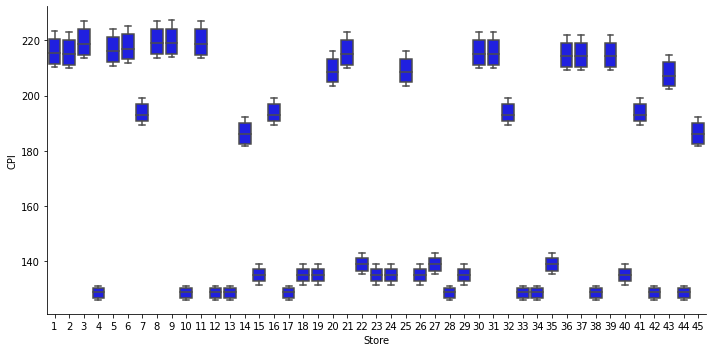

In [ ]:
plt.figure(figsize=(20, 6))
sns.catplot(data = df, x = 'Store', y = 'CPI' , color = 'b', kind = 'box', aspect = 2)
plt.show()

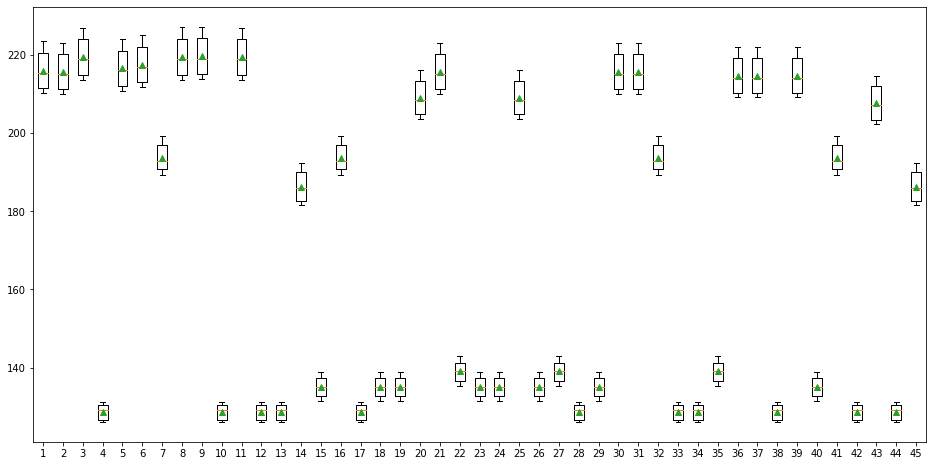

In [ ]:
store_cpi = []
for number in range(1, 46):
    store = df.loc[df['Store'] == number]
    store_cpi.append(store['CPI'])
fig = plt.figure(figsize =(16,8))
plt.boxplot(store_cpi, showmeans=True)
plt.show()

Conseguimos notar uma diferença considerável do índice de uma loja para a outra, podemos imaginar que seja relacionado ao custo de vida da localização dessas lojas.

Ou seja, provavelmente algumas lojas estão em estados com custo de vida maior e outros menores.

Mas não parece ser algo que vá interferir diretamente na quantidade de vendas, como visto no gráfico anterior.

Gráfico com as vendas máximas, mínimas e médias de todas as lojas ao longo do tempo.



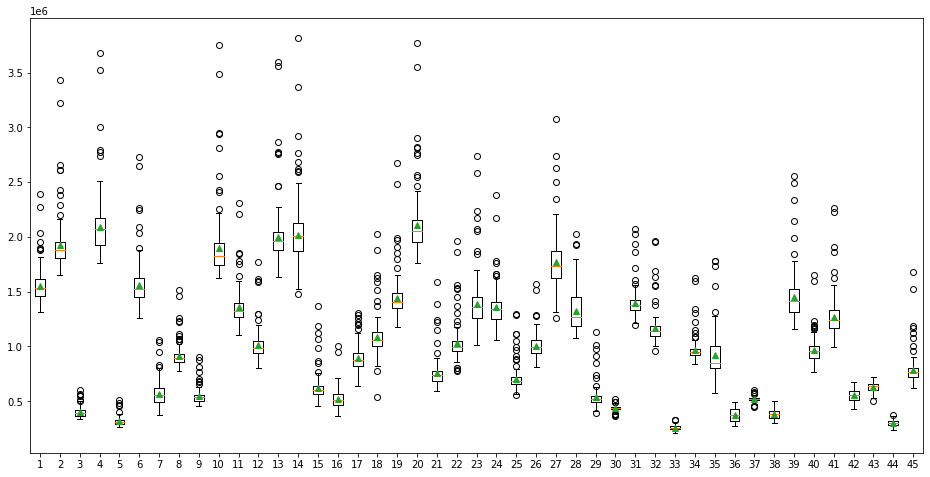

In [ ]:
store_sales=[]
for number in range(1, 46):
    store = df.loc[df['Store'] == number]
    store_sales.append(store['Weekly_Sales'])
fig = plt.figure(figsize =(16,8))
plt.boxplot(store_sales, showmeans=True)
plt.show()
# vale notar que as lojas 4 e 14 que também vendem bastante apresentam uma variancia superior quando comparadas com a loja 20, o que não é mto vantajoso 

10 lojas com as maiores médias de vendas. A média de venda, a sua maior e menor venda

In [ ]:
sales = df.groupby(['Store']).agg({'Weekly_Sales':['mean','max','sum']})
sales.nlargest(10, ('Weekly_Sales', 'mean'))

Weekly_Sales                        
              mean        max          sum
Store                                     
20      2107676.87 3766687.43 301397792.46
4       2094712.96 3676388.98 299543953.38
14      2020978.40 3818686.45 288999911.34
13      2003620.31 3595903.20 286517703.80
2       1925751.34 3436007.68 275382440.98
10      1899424.57 3749057.69 271617713.89
27      1775216.20 3078162.08 253855916.88
6       1564728.19 2727575.18 223756130.64
1       1555264.40 2387950.20 222402808.85
39      1450668.13 2554482.84 207445542.47

Vamos plotar um gráfico com a soma das vendas de cada uma das lojas e traçar linhas com alguns marcos de vendas total.

Linha Vermelha 100.000.000

Linha Laranja 200.000.000

Linha Verde 300.000.000



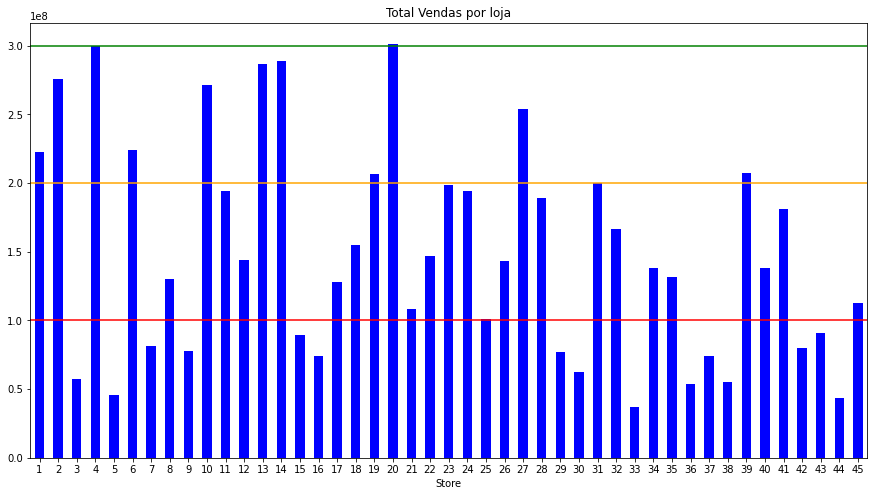

In [ ]:
plt.figure(figsize = (15,8))
sales[('Weekly_Sales',  'sum')].plot(kind = 'bar',color = 'blue')
plt.xticks(rotation = 0)
plt.title('Total Vendas por loja')
plt.axhline(y=100000000,color = 'red')
plt.axhline(y=200000000,color = 'orange')
plt.axhline(y=300000000,color = 'green')
plt.show()

Podemos fazer o mesmo com os valores de maiores vendas.

Linha Vermelha 1.000.000

Linha Laranja 2.000.000

Linha Verde 3.000.000

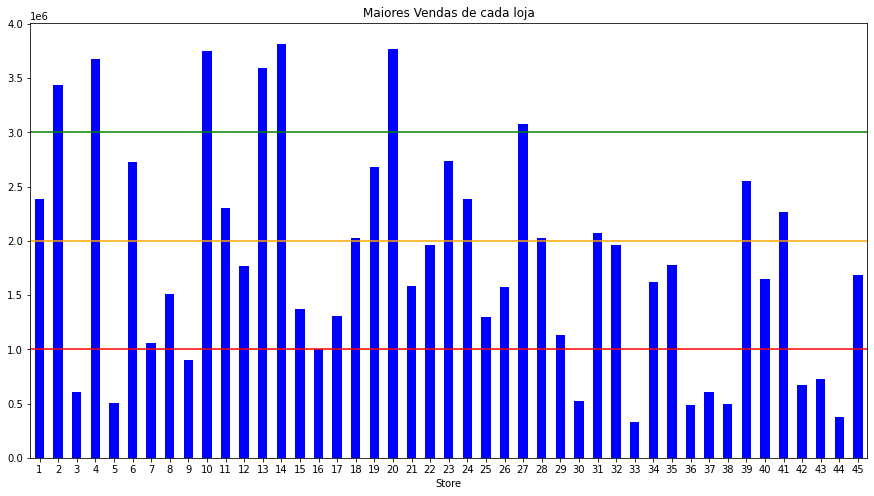

In [ ]:
plt.figure(figsize = (15,8))
sales[('Weekly_Sales',  'max')].plot(kind = 'bar',color = 'blue')
plt.xticks(rotation = 0)
plt.title('Maiores Vendas de cada loja')
plt.axhline(y=1000000,color = 'red')
plt.axhline(y=2000000,color = 'orange')
plt.axhline(y=3000000,color = 'green')
plt.show()

Com base nos gráficos acima podemos tirar algumas conclusões.

Lojas com total de vendas entre as linhas laranjas e verde são lojas que tem uma performance maior, enquanto aquelas abaixo da linha vermelha não performam muito bem.

E a mesma análise se encaixa nos valores de maiores vendas.

De acordo com os gráficos acima, podemos destacar como melhores lojas:


*   Loja 02
*   Loja 04
*   Loja 10
*   Loja 13
*   Loja 14
*   Loja 20



Então vamos olhar mais de perto essas 6 lojas.

In [ ]:
best_options = df[
                  (df['Store'] == 2) | 
                  (df['Store'] == 4) | 
                  (df['Store'] == 10) | 
                  (df['Store'] == 13) |
                  (df['Store'] == 14) | 
                  (df['Store'] == 20)
                  ]
best_options

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
143,2,2010-02-05,2136989.46,0,4.55,2.57,210.75,8.32,2,2010
144,2,2010-02-12,2137809.50,1,3.61,2.55,210.90,8.32,2,2010
145,2,2010-02-19,2124451.54,0,4.27,2.51,210.95,8.32,2,2010
146,2,2010-02-26,1865097.27,0,7.83,2.56,210.98,8.32,2,2010
147,2,2010-03-05,1991013.13,0,8.43,2.62,211.01,8.32,3,2010
...,...,...,...,...,...,...,...,...,...,...
2855,20,2012-09-28,2008350.58,0,14.81,4.00,215.74,7.28,9,2012
2856,20,2012-10-05,2246411.89,0,15.98,3.98,215.93,7.29,10,2012
2857,20,2012-10-12,2162951.36,0,8.44,4.00,216.12,7.29,10,2012
2858,20,2012-10-19,1999363.49,0,13.48,3.97,216.15,7.29,10,2012


Vamos repetir a análise com a média de venda, maior e menor venda das 3 lojas que selecionamos como melhores opções.

In [ ]:
sales_best_stores = best_options.groupby(['Store']).agg({'Weekly_Sales':['mean','max','sum']})
sales_best_stores

Weekly_Sales                        
              mean        max          sum
Store                                     
2       1925751.34 3436007.68 275382440.98
4       2094712.96 3676388.98 299543953.38
10      1899424.57 3749057.69 271617713.89
13      2003620.31 3595903.20 286517703.80
14      2020978.40 3818686.45 288999911.34
20      2107676.87 3766687.43 301397792.46

Analisar se, dentre as melhores lojas, o Holiday Flag influencia na média das vendas e na maior venda de cada loja.

In [ ]:
holyday_sales = best_options.groupby(['Store','Holiday_Flag']).agg({'Weekly_Sales':['mean','max']})
holyday_sales = holyday_sales.reset_index()
holyday_sales

Store Holiday_Flag Weekly_Sales           
                              mean        max
0      2            0   1914208.81 3436007.68
1      2            1   2079266.90 2658725.29
2      4            0   2083555.84 3676388.98
3      4            1   2243102.62 3004702.33
4     10            0   1883309.43 3749057.69
5     10            1   2113755.95 2950198.64
6     13            0   1995392.98 3595903.20
7     13            1   2113043.81 2864170.61
8     14            0   2013489.33 3818686.45
9     14            1   2120583.00 2921709.71
10    20            0   2097048.43 3766687.43
11    20            1   2249035.08 2906233.25

A média de vendas costuma ser pouca coisa maior nos feriados, mas nenhuma das maiores vendas foi em uma semana de feriado.

Conforme melhor visualizado nos gráficos abaixo.

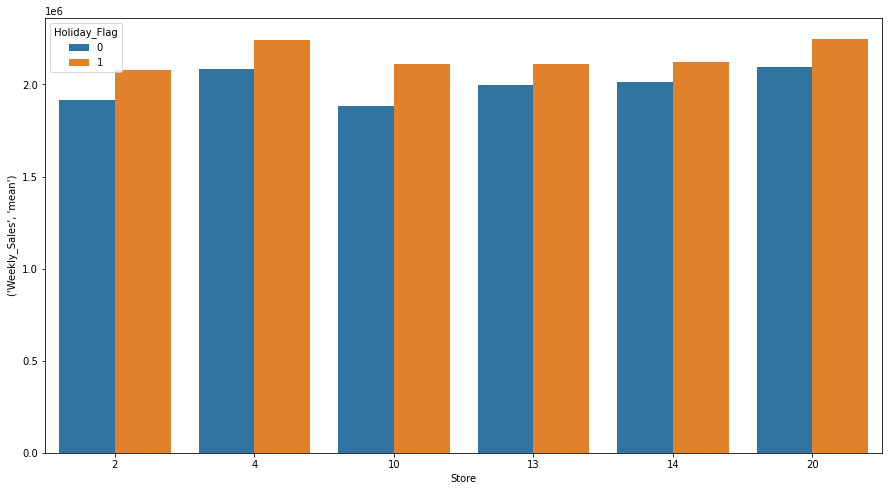

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Store',y = ('Weekly_Sales',  'mean'),hue= 'Holiday_Flag',data = holyday_sales)
plt.show()

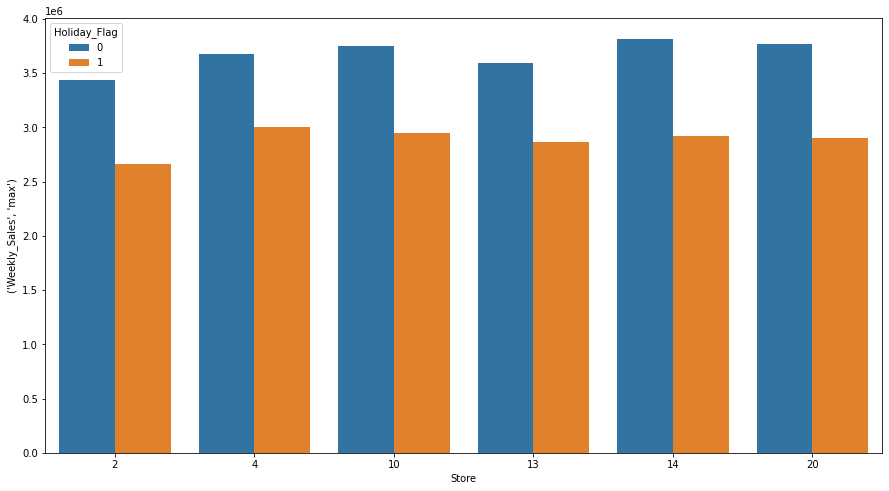

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Store',y = ('Weekly_Sales',  'max'),hue= 'Holiday_Flag',data = holyday_sales)
plt.show()

In [ ]:
print("Média das vendas semanais das melhores lojas:", best_options['Weekly_Sales'].mean())
print("Quantidade de semanas:", best_options.shape[0])

df_mean = best_options[best_options['Weekly_Sales'] >= best_options['Weekly_Sales'].mean()].sort_values('Weekly_Sales', ascending=False)

print("Quantidade de semanas com vendas acima da média:", df_mean.shape[0])

print("Proporção de semanas acima da média: {:.2%} ".format((df_mean.shape[0] / best_options.shape[0])))

df_mean.head()

Média das vendas semanais das melhores lojas: 2008694.0744172519
Quantidade de semanas: 858
Quantidade de semanas com vendas acima da média: 344
Proporção de semanas acima da média: 40.09% 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
1905,14,2010-12-24,3818686.45,0,-0.78,3.14,182.54,8.72,12,2010
2763,20,2010-12-24,3766687.43,0,-3.79,3.14,204.64,7.48,12,2010
1333,10,2010-12-24,3749057.69,0,13.92,3.24,126.98,9.00,12,2010
527,4,2011-12-23,3676388.98,0,2.18,3.10,129.98,5.14,12,2011
1762,13,2010-12-24,3595903.20,0,1.61,2.85,126.98,7.79,12,2010


Vamos refazer o gráfico de correlação, para ver se entre as melhores opções que selecionamos, existe alguma correlação entre as features.

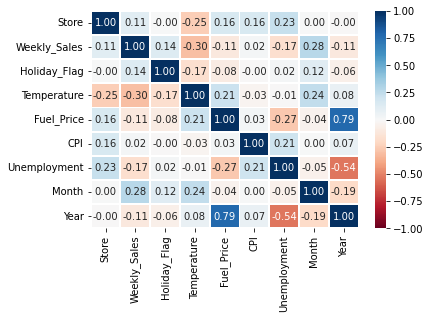

In [ ]:
corr_best_options = best_options.corr()


sns.heatmap(corr_best_options, cmap="RdBu", vmin=-1, vmax=1, annot=True, fmt='.2f', linewidth=1)
plt.show()

De novo não enxergamos nenhuma correlação forte com a Weekly Sales.

Apenas uma leve correlação negativa com a Temperatura e uma leve correlação positiva com o mês, explicado pelas maiores vendas no mês de dezembro (mês 12).

Vamos analisar agora a distribuição de Temperatura, CPI e Unemployment dentre as melhores lojas selecionadas.

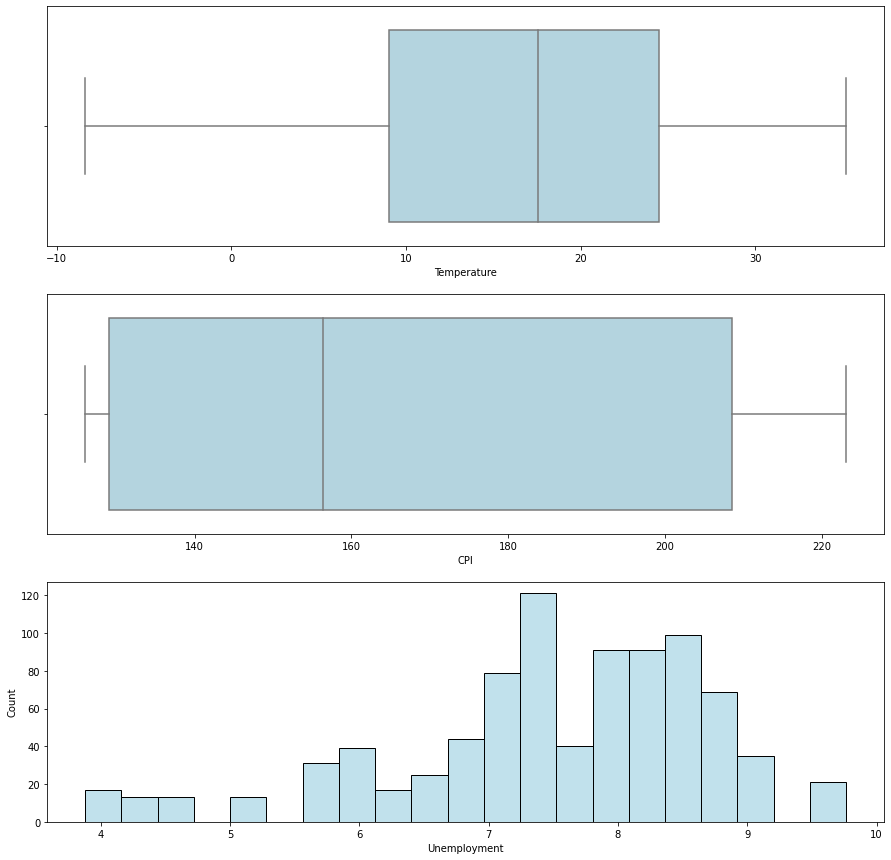

In [ ]:
fig, axs = plt.subplots(nrows=3, figsize=(15, 15))
# Temperature
sns.boxplot(x = best_options['Temperature'], ax=axs[0], color='lightblue')
# CPI
sns.boxplot(x = best_options['CPI'], ax=axs[1], color='lightblue')
# Unemployment
sns.histplot(x = best_options['Unemployment'], ax=axs[2], color='lightblue')

plt.show()

Vamos avaliar mais de perto a relação de Temperatura e Vendas

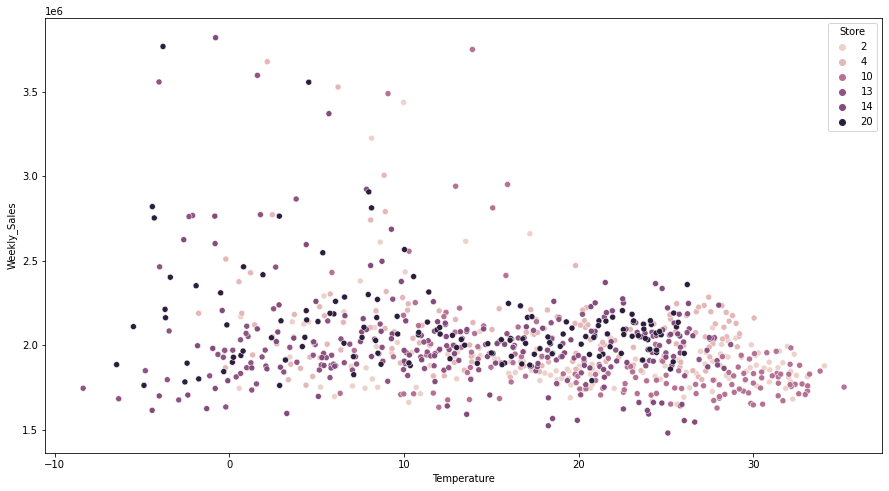

In [ ]:
# Temparature vs Weekly Sales
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'Temperature',y = 'Weekly_Sales',hue = 'Store', data = best_options)
plt.show()

Agora a relação de CPI com Vendas

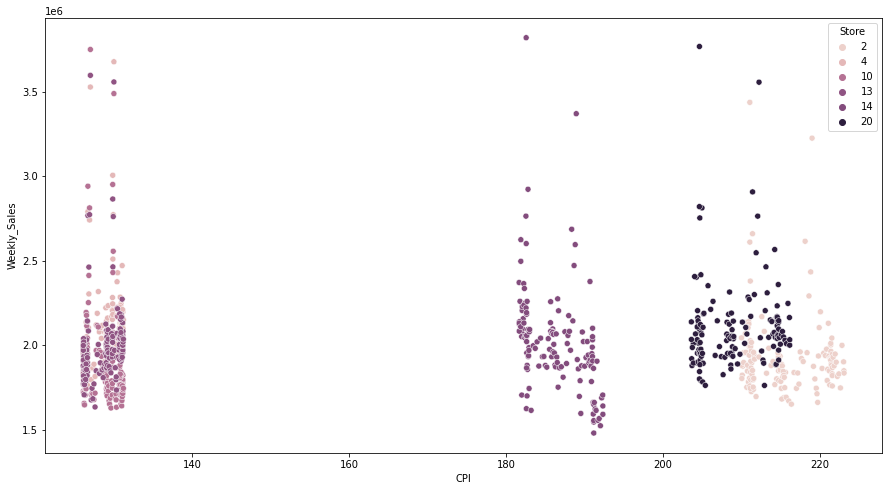

In [ ]:
# CPI vs Weekly Sales
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'CPI',y = 'Weekly_Sales', hue = 'Store', data = best_options)
plt.show()

E por fim o nível de desemprego com as vendas

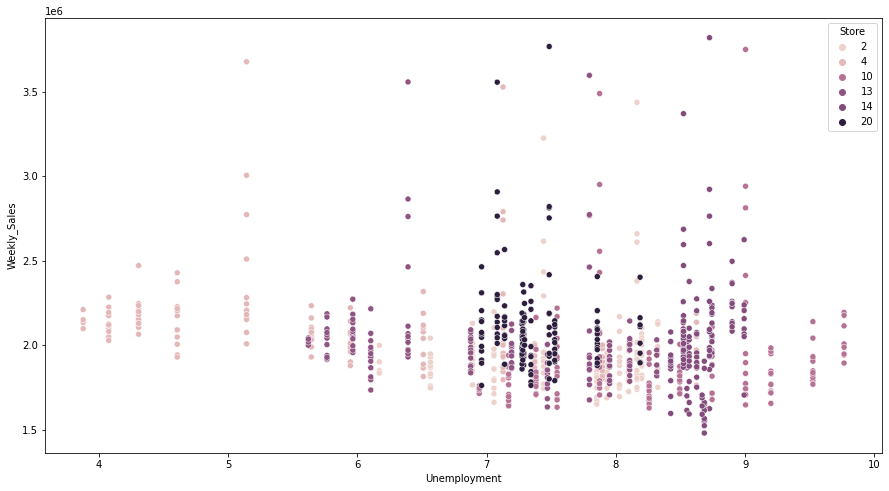

In [ ]:
# Unemployment vs Week_sales
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'Unemployment',y = 'Weekly_Sales', hue = 'Store', data = best_options)
plt.show()

Baseado nas análises, vamos agora focar nas duas melhores lojas em nossa opinião.

São as lojas 14 e loja 20, uma delas será a escolhida.

In [ ]:
df_stores_final = best_options[
                               (best_options['Store'] == 14) | 
                               (best_options['Store'] == 20)
                               ]
df_stores_final

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
1859,14,2010-02-05,2623469.95,0,-2.61,2.78,181.87,8.99,2,2010
1860,14,2010-02-12,1704218.84,1,-2.37,2.77,181.98,8.99,2,2010
1861,14,2010-02-19,2204556.70,0,-0.41,2.75,182.03,8.99,2,2010
1862,14,2010-02-26,2095591.63,0,1.61,2.75,182.08,8.99,2,2010
1863,14,2010-03-05,2237544.75,0,2.85,2.78,182.12,8.99,3,2010
...,...,...,...,...,...,...,...,...,...,...
2855,20,2012-09-28,2008350.58,0,14.81,4.00,215.74,7.28,9,2012
2856,20,2012-10-05,2246411.89,0,15.98,3.98,215.93,7.29,10,2012
2857,20,2012-10-12,2162951.36,0,8.44,4.00,216.12,7.29,10,2012
2858,20,2012-10-19,1999363.49,0,13.48,3.97,216.15,7.29,10,2012


Vamos plotar alguns gráficos para comparar essas duas lojas.

Primeiro será um gráfico comparando o CPI entre as duas.

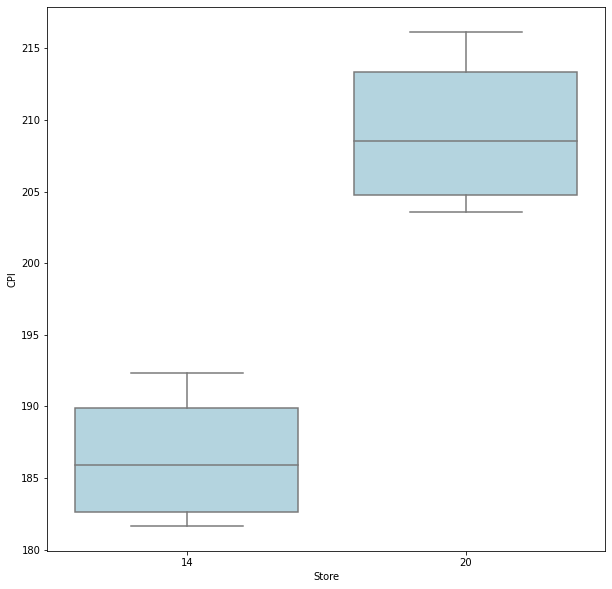

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x = 'Store', y = 'CPI', data = df_stores_final, color='lightblue')
plt.show()

Segundo um gráfico comparando a taxa de desemprego entre elas.

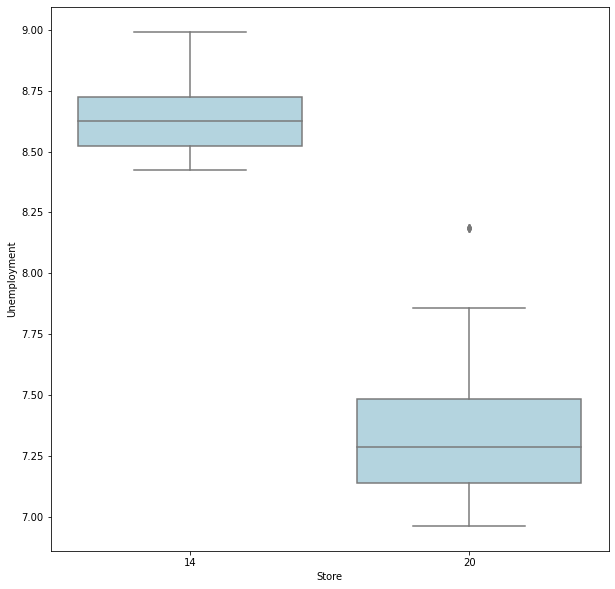

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x = 'Store', y = 'Unemployment', data = df_stores_final, color='lightblue')
plt.show()

E por fim uma comparação das vendas.

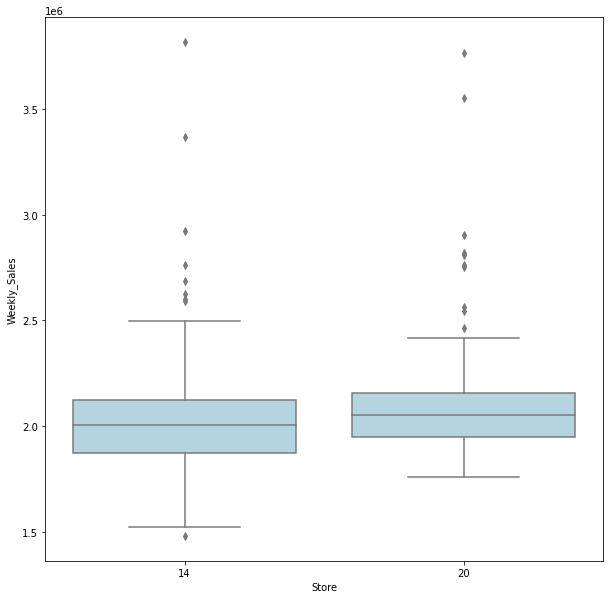

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x = 'Store', y = 'Weekly_Sales', data = df_stores_final, color='lightblue')
plt.show()

## 6. Conclusão

Qual a loja escolheremos para expansão e por que?

Como podemos ver, no quesito de vendas as duas lojas são bem parecidas, o que diferencia as duas são o CPI e a taxa de desemprego.

A Loja 20 apresenta um faturamento mais consistente que a 14.

O CPI da loja 20 é consideravelmente mais elevado, o que pode indicar que ela está situada em uma região com um custo de vida mais alto e consequentemente com uma população mais abastada.

Olhando para a taxa de desemprego, a loja 14 é maior, sendo inclusive acima da média geral de todas as lojas que é de 8,00.

Analisando a taxa de desemprego nos Estados Unidos, podemos ver que é cíclica.

No gráfico abaixo vemos que ela sempre se alterna entre percentuais mais altos e com tendência de diminuir em seguida.

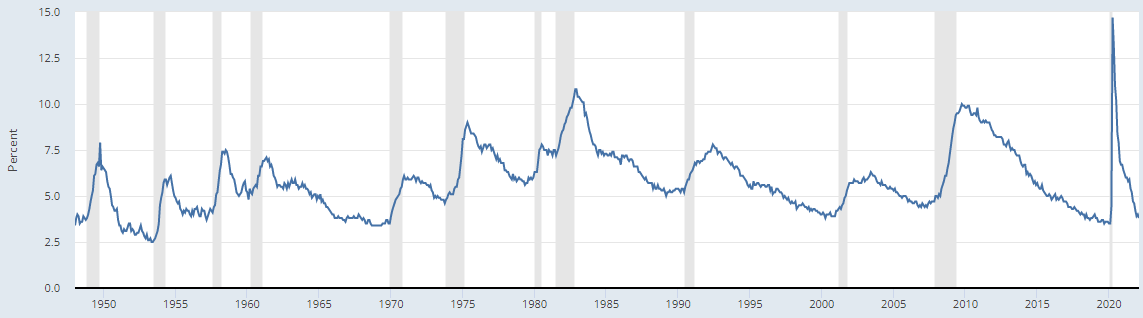

Portanto, levando isso em consideração vamos optar pela **Loja 14**.

Com o seguinte raciocínio:


*   Ambas as lojas (14 e 20) tem um faturamento similar.
*   A loja 14, tem uma taxa de desemprego elevada, e pensando no seu comportamento cíclico tende a diminuir com o tempo.
*   Quando o desemprego na região diminuir o faturamento da loja 14 tenderá a ser maior.

